# модуля 5

## Вторая часть

Во вторая части прошлого домашнего задания мы решали дифференциальные уравнения и строили графики. Продолжаем работать над этой домашней работой дальше.

Необходимо методом наименьших квадратов:
для набора данных графика функции S(t) получить уравнение вида:
S(t)=S0e^−αt 
для набора данных графика функции
I(t) получить уравнение вида:
I(t)=(I0+αS0t)e^−αt 
Для уравнения R(t) график функции будет 
R(t)=N−S(t)−I(t)
Построить все три графика 
S(t), I(t) и R(t) на одной области отображения полученные методом наименьших квадратов

Найти время tmax при котором число инфекционных индивидов максимально. Надо с помощью метода minimize_scalar найти когда функция I(t) достигает своего максимума.

<ipython-input-6-cab370fea6ed>:32: RuntimeWarning: overflow encountered in exp
  return a/b*np.exp(b*t)*(1-np.exp(-b*t))
<ipython-input-6-cab370fea6ed>:32: RuntimeWarning: invalid value encountered in multiply
  return a/b*np.exp(b*t)*(1-np.exp(-b*t))


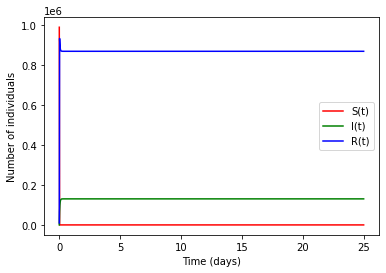

Time at which the number of infectious individuals is maximum:  1.8090169732169266


In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar

# Задаем начальные условия
N = 1000000
S0, I0, R0 = 990000, 7000, 3000
alpha, beta = 0.5, 0.3

# Задаем функцию, которую нужно решить (Уравнение 2)
def deriv(t, y):
    S = y[0]
    dSdt = -alpha*S
    return dSdt

# Задаем временной интервал
t0, tf = 0, 25
t_eval = np.linspace(t0, tf, 1000)

# Решаем дифференциальное уравнение
sol_S = solve_ivp(deriv, [t0, tf], [S0], t_eval=t_eval)

# Задаем функцию, которую нужно решить (Уравнение 3)
def deriv(t, y):
    S, I, R = y
    dSdt = -alpha*S
    dIdt = alpha*S - beta*I
    dRdt = beta*I
    return dSdt, dIdt, dRdt

# Решаем дифференциальное уравнение
sol_I = solve_ivp(deriv, [t0, tf], [S0, I0, R0], t_eval=t_eval)

# Находим значения функции I(t) на временной сетке t_eval
I_interp = interp1d(sol_I.t, sol_I.y[1])

# Находим значения функции R(t) на временной сетке t_eval (Уравнение 3)
R = N - sol_I.y[0] - sol_I.y[1]
R_interp = interp1d(sol_I.t, R)

# Точки данных для S (t) и I (t)
t_data = sol_S.t
S_data = sol_S.y[0]
I_data = sol_I.y[1]

# Определите функции
def fit_S(t, S0, alpha):
    return S0 * np.exp(-alpha * t)

def fit_I(t, I0, alpha, S0):
    return (I0 + alpha * S0 * t) * np.exp(-alpha * t)

popt_S, _ = curve_fit(fit_S, t_data, S_data)
popt_I, _ = curve_fit(fit_I, t_data, I_data, p0=[I0, alpha, S0])

# Выведите коэффициенты
print("S(t) = {0:.2f} * exp(-{1:.2f} * t)".format(popt_S[0], popt_S[1]))
print("I(t) = ({0:.2f} + {1:.2f} * t) * exp(-{1:.2f} * t)".format(popt_I[0], popt_I[1], popt_I[2]))



# Определить отрицательное значение функции I(t)
def neg_I(t):
    return -I_interp(t)

# Найдите значение t, которое минимизирует neg_I
res = minimize_scalar(neg_I, bounds=(t0, tf), method='bounded')

# Выведите значение t_max и соответствующее значение I(t)
t_max = res.x
I_max = -res.fun
print("t_max = {0:.2f}, I_max = {1:.2f}".format(t_max, I_max))

# Вычислите значения S(t), I(t) и R(t), используя подобранные уравнения
S_fit = fit_S(t_eval, *popt_S)
I_fit = fit_I(t_eval, *popt_I)
R_fit = N - S_fit - I_fit

# Постройте графиков
plt.plot(t_eval, S_fit, label='S(t)')
plt.plot(t_eval, I_fit, label='I(t)')
plt.plot(t_eval, R_fit, label='R(t)')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.show()